# Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler,MinMaxScaler


# 1. Load the Data

In [63]:
# Bitcoin Price
btc_path = "/Users/estherx/UngoogleDrive/stonkgo_data/bitcoin/historical/cleaned_bitcoin_2019-01-01_to_2023-12-31.csv"
btc_df = pd.read_csv(btc_path)
btc_df.head()

,kline_close_time,open_price,high_price,low_price,close_price,volume,quote_asset_volume,num_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2019-01-01 00:59:59,3701.23,3713.00,3689.88,3700.31,686.367420,2.539069e+06,5534.0,370.855314,1.371962e+06
1,2019-01-01 01:59:59,3700.20,3702.73,3684.22,3689.69,613.539115,2.266700e+06,5086.0,320.644448,1.184519e+06
2,2019-01-01 02:59:59,3689.67,3695.95,3675.04,3690.00,895.302181,3.302044e+06,6391.0,471.857118,1.740469e+06
3,2019-01-01 03:59:59,3690.00,3699.77,3685.78,3693.13,796.714818,2.942422e+06,5709.0,459.948381,1.698857e+06
4,2019-01-01 04:59:59,3692.32,3720.00,3685.94,3692.71,1317.452909,4.872937e+06,7908.0,770.995533,2.852106e+06


In [112]:
btc_df.tail()

,open_price,high_price,low_price,close_price,volume,quote_asset_volume,num_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,price_change
kline_close_time,,,,,,,,,,
2023-12-31 19:59:59,42656.69,42695.44,42586.91,42619.04,703.55791,2.999955e+07,33260.0,341.33239,1.455377e+07,-0.000883
2023-12-31 20:59:59,42619.04,42680.36,42504.56,42558.01,1015.14035,4.323263e+07,42477.0,518.20861,2.206738e+07,-0.001432
2023-12-31 21:59:59,42558.02,42670.44,42520.72,42520.72,923.43813,3.933675e+07,36012.0,478.31848,2.037314e+07,-0.000876
2023-12-31 22:59:59,42520.73,42591.10,42056.00,42257.88,1811.59411,7.676401e+07,75332.0,820.10687,3.475532e+07,-0.006181
2023-12-31 23:59:59,42257.89,42345.65,42066.00,42283.58,1710.13721,7.219804e+07,55536.0,777.45746,3.282236e+07,0.000608


In [64]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   kline_close_time              43824 non-null  object 
 1   open_price                    43824 non-null  float64
 2   high_price                    43824 non-null  float64
 3   low_price                     43824 non-null  float64
 4   close_price                   43824 non-null  float64
 5   volume                        43824 non-null  float64
 6   quote_asset_volume            43757 non-null  float64
 7   num_of_trades                 43824 non-null  float64
 8   taker_buy_base_asset_volume   43824 non-null  float64
 9   taker_buy_quote_asset_volume  43824 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.3+ MB


In [65]:
# Reddit Submibissions
reddit_submissions_path = "/Users/estherx/UngoogleDrive/stonkgo_data/reddit/historical/submissions/cleaned_sentiment_submissions_2019-01-01_to_2023-12-31.parquet"
submissions_df = pd.read_parquet(reddit_submissions_path)
submissions_df.head()

,id,archived,author,can_gild,contest_mode,created_utc,gilded,hidden,is_crosspostable,is_self,...,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,sentiment_negative,sentiment_neutral,sentiment_positive
0,ln9hfp,False,rBitcoinMod,True,False,2021-02-19 07:00:21,0,False,True,True,...,0.001364,0.000029,0.000800,0.000157,0.000113,0.000081,0.000078,0.021421,0.718185,0.260394
1,agwhnr,False,Irushrating,True,False,2019-01-17 10:35:51,0,False,True,True,...,0.000062,0.000012,0.000208,0.000011,0.000013,0.000098,0.000059,0.039529,0.836113,0.124357
2,v5xxve,False,Chinesepolic,True,False,2022-06-06 08:18:28,0,False,True,True,...,0.001069,0.000062,0.006308,0.000208,0.000185,0.004088,0.000135,0.497874,0.472329,0.029796
3,gx5fsn,True,emmawyatt8,True,False,2020-06-05 14:19:21,0,False,True,True,...,0.004145,0.000271,0.002140,0.000201,0.000211,0.000410,0.000846,0.005164,0.021769,0.973066
4,mo222m,False,Balaerix,True,False,2021-04-10 10:13:12,0,False,True,True,...,0.009294,0.000057,0.001994,0.000134,0.000286,0.000598,0.000835,0.027681,0.762193,0.210126


# 2. EDA(Exploratory Data Analysis)
## 2.1 Bitcoin

In [66]:
btc_df['kline_close_time'] = pd.to_datetime(btc_df['kline_close_time'])


### 2.1.1 Plot Closing Prices and All Prices 

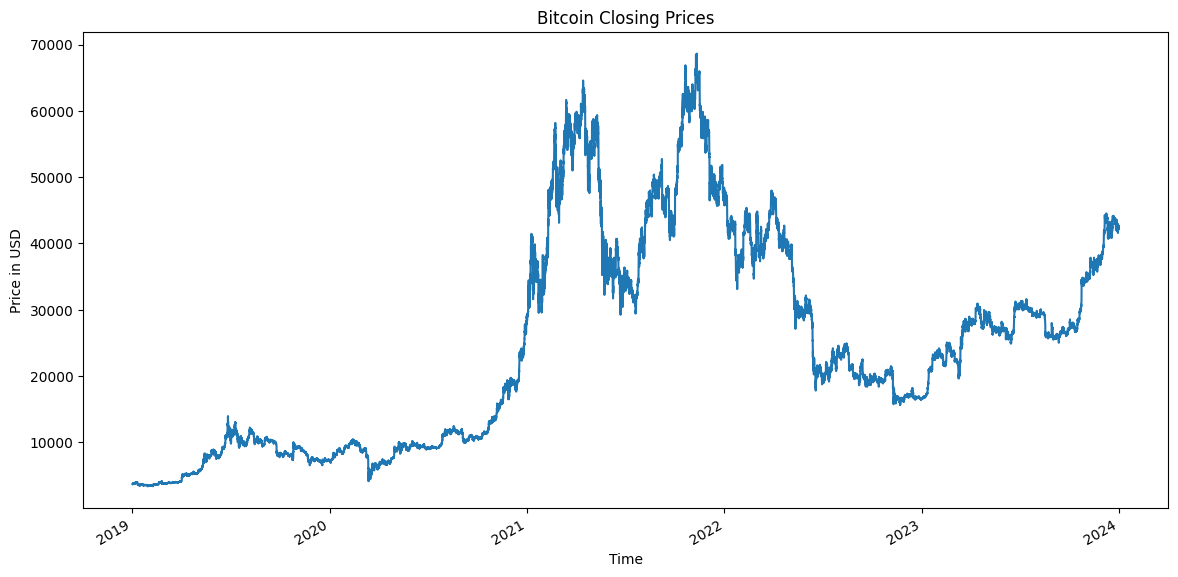

<Figure size 1400x700 with 0 Axes>

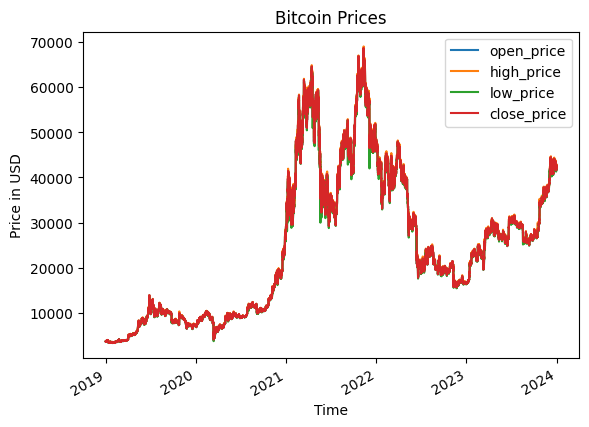

In [96]:
# Plotting the closing prices
plt.figure(figsize=(14, 7))
btc_df['close_price'].plot(title='Bitcoin Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.show()

# Plotting all prices 
plt.figure(figsize=(14, 7))
btc_df[['open_price', 'high_price', 'low_price', 'close_price']].plot(title='Bitcoin Prices')
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.show()

### 2.1.2 Plot Volume

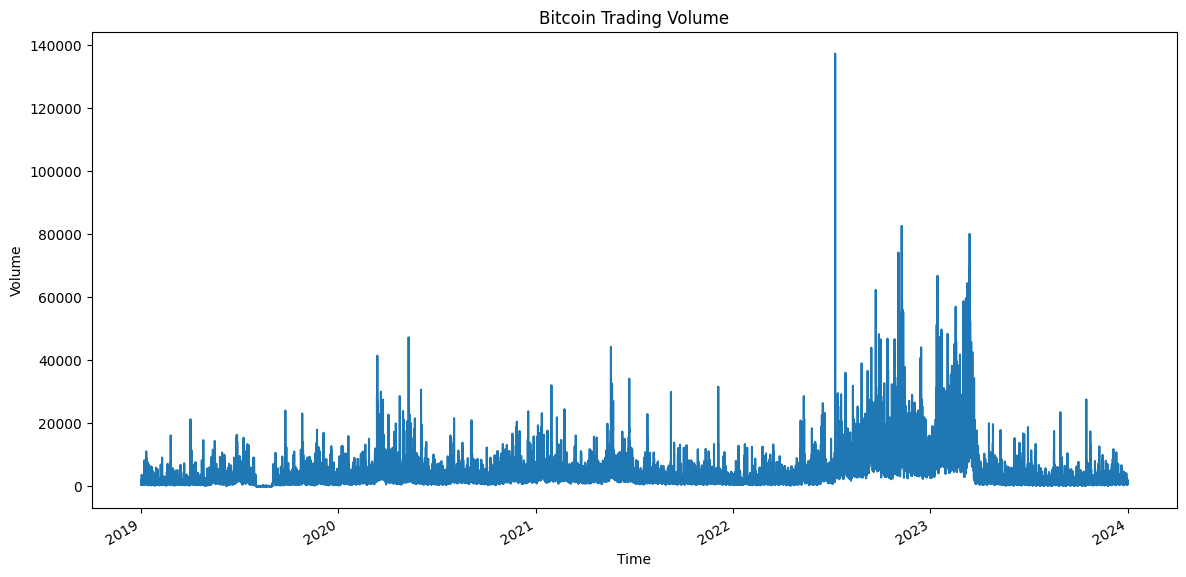

In [95]:
plt.figure(figsize=(14, 7))
btc_df['volume'].plot(title='Bitcoin Trading Volume')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.show()


### 2.1.3 Distribution of Price Changes

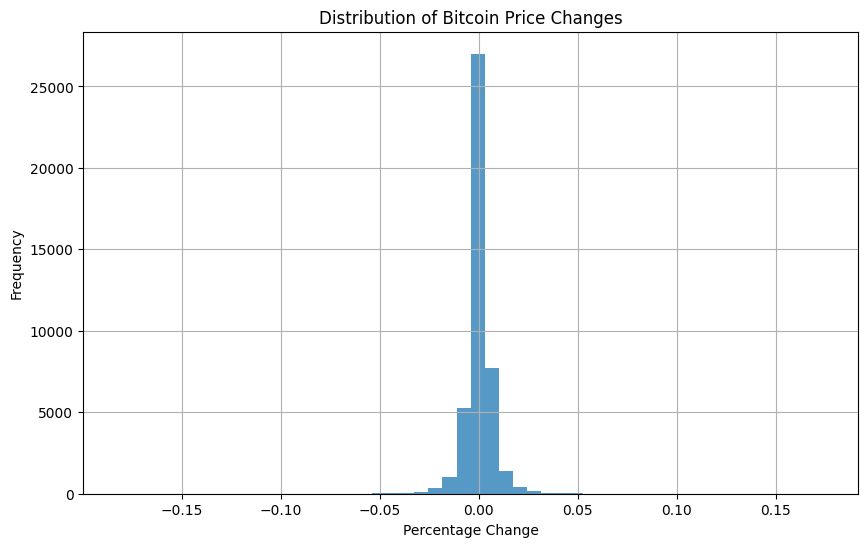

In [69]:
# Calculate daily returns
btc_df['price_change'] = btc_df['close_price'].pct_change()

# Plot the distribution of price changes
plt.figure(figsize=(10, 6))
btc_df['price_change'].hist(bins=50, alpha=0.75)
plt.title('Distribution of Bitcoin Price Changes')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.show()


- The data is predominantly clustered around a zero percentage change, indicating that on many occasions, the price changes are minimal. In other words, the shape of the distribution suggests that most price changes are not extreme, which might allow models based on historical price data to predict short-term movements with reasonable accuracy.

- The histogram appears to be symmetric with a slight skew towards the right. This could imply that there are slightly more frequent small positive changes than negative ones.

- The tails of the distribution show that significant price changes, both positive and negative, are relatively rare but do occur. The existence of these tails is typical for financial data, reflecting market shocks or major news events.

### 2.1.4 Analyze Trading Activity

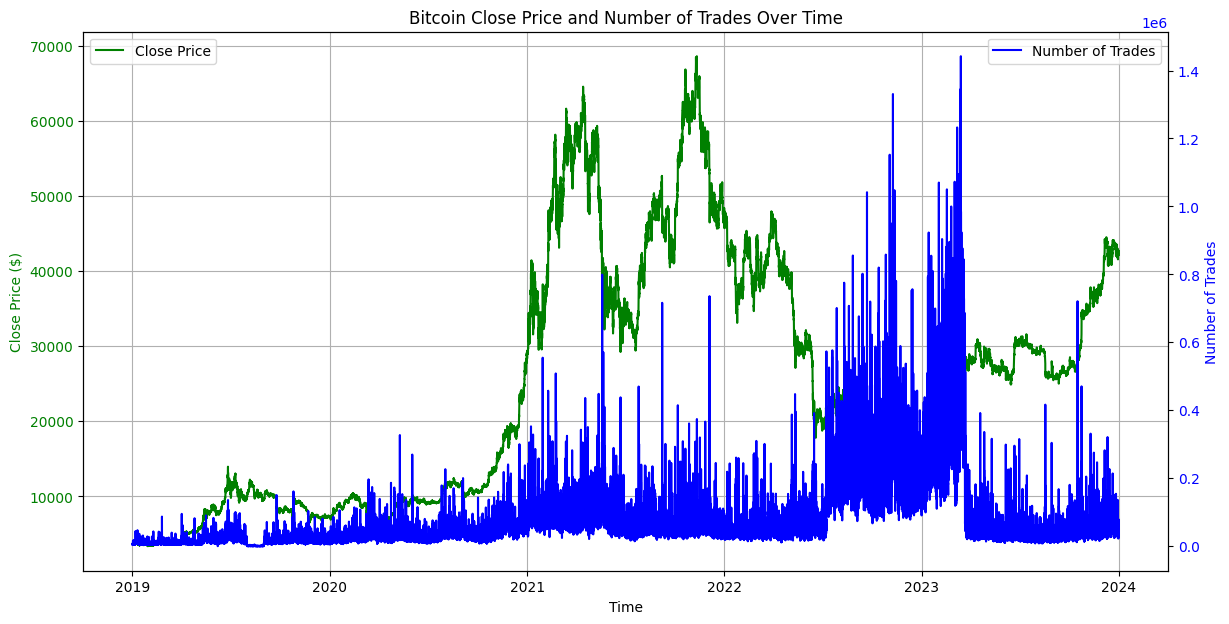

In [94]:
fig, ax1 = plt.subplots(figsize=(14, 7))

ax2 = ax1.twinx()

# Plotting the close price on the first y-axis
ax1.plot(btc_df.index, btc_df['close_price'], 'g-', label='Close Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Close Price ($)', color='g')

# Ensuring the tick labels match the line color
ax1.tick_params(axis='y', labelcolor='g')

# Plotting the number of trades on the second y-axis
ax2.plot(btc_df.index, btc_df['num_of_trades'], 'b-', label='Number of Trades')
ax2.set_ylabel('Number of Trades', color='b')

# Ensuring the tick labels match the line color
ax2.tick_params(axis='y', labelcolor='b')


plt.title('Bitcoin Close Price and Number of Trades Over Time')
ax1.grid(True)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

The plot illustrating Bitcoin's close price and the number of trades over time offers significant insights into the market dynamics:

1. **Volatility and Market Events**: Bitcoin's price is highly volatile, with sharp peaks and troughs aligning with key market events, indicating sensitivity to developments such as regulatory changes or economic factors.

2. **Trading Activity and Price Movements**: The number of trades typically increases during periods of high price volatility, suggesting that traders are actively responding to price changes, either to capitalize on opportunities or to manage risks.

3. **Scale Differences**: The plot highlights the vast differences in scale between price values and trade volumes, underscoring the disproportionate impact of price changes on trading behaviors.

4. **Market Trends**: A general upward trend in price through 2020 and 2021, followed by corrections, mirrors corresponding spikes in trade volumes, reflecting reactive trading patterns to price movements.

5. **Indicator Potential**: Trade volumes may serve as potential leading indicators of price volatility if they consistently rise prior to major price movements, offering predictive insights into market trends.

6. **Analytical Utility**: This visual analysis is crucial for understanding how trading volumes and price interact, helping market participants strategize effectively during volatile periods. Further analysis could deepen understanding of these relationships.

In summary, the graph is a powerful tool for decoding Bitcoin's market behavior, particularly how trading activity correlates with and possibly anticipates price changes.

## 2.2 Reddit Submissions

In [71]:
submissions_df['created_utc'] = pd.to_datetime(submissions_df['created_utc'])


### 2.2.1 Summary Statistics

In [72]:
submissions_df.describe()

,created_utc,total_awards_received,upvote_ratio,emotion_admiration,emotion_amusement,emotion_anger,emotion_annoyance,emotion_approval,emotion_caring,emotion_confusion,...,emotion_optimism,emotion_pride,emotion_realization,emotion_relief,emotion_remorse,emotion_sadness,emotion_surprise,sentiment_negative,sentiment_neutral,sentiment_positive
count,104386,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,...,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000,104386.000000
mean,2021-06-15 12:15:29.283697152,0.219129,0.735144,0.014568,0.011363,0.003178,0.016676,0.031834,0.007725,0.114735,...,0.021146,0.000419,0.011644,0.000943,0.008551,0.007266,0.006024,0.241736,0.562204,0.196060
min,2019-01-01 00:05:35,0.000000,0.030000,0.000041,0.000014,0.000008,0.000024,0.000121,0.000013,0.000015,...,0.000044,0.000005,0.000034,0.000007,0.000007,0.000012,0.000011,0.001112,0.006722,0.003810
25%,2020-07-23 09:55:40,0.000000,0.630000,0.000536,0.000325,0.000394,0.001480,0.003591,0.000585,0.002500,...,0.001464,0.000032,0.001715,0.000086,0.000158,0.000361,0.000609,0.025384,0.368397,0.033577
50%,2021-04-06 23:09:47.500000,0.000000,0.760000,0.000998,0.000514,0.000667,0.002950,0.007731,0.001131,0.039745,...,0.003060,0.000071,0.003501,0.000214,0.000290,0.000618,0.001414,0.117190,0.607031,0.080522
75%,2022-05-08 17:20:43.500000,0.000000,0.880000,0.002525,0.000794,0.001132,0.006802,0.022463,0.002580,0.142967,...,0.007618,0.000200,0.007686,0.000573,0.000699,0.001489,0.002509,0.418392,0.771967,0.253763
max,2023-12-30 23:52:40,228.000000,1.000000,0.994545,0.985513,0.922178,0.892913,0.972244,0.967288,0.979173,...,0.981155,0.343797,0.938960,0.243073,0.912628,0.975053,0.959045,0.962986,0.961905,0.991624
std,NaN,2.454373,0.199571,0.073452,0.084029,0.025086,0.063171,0.076651,0.050041,0.180663,...,0.087640,0.004237,0.050314,0.004133,0.064551,0.046489,0.037700,0.263365,0.247588,0.247517


### 2.2.2 Distribution of Numerical Data

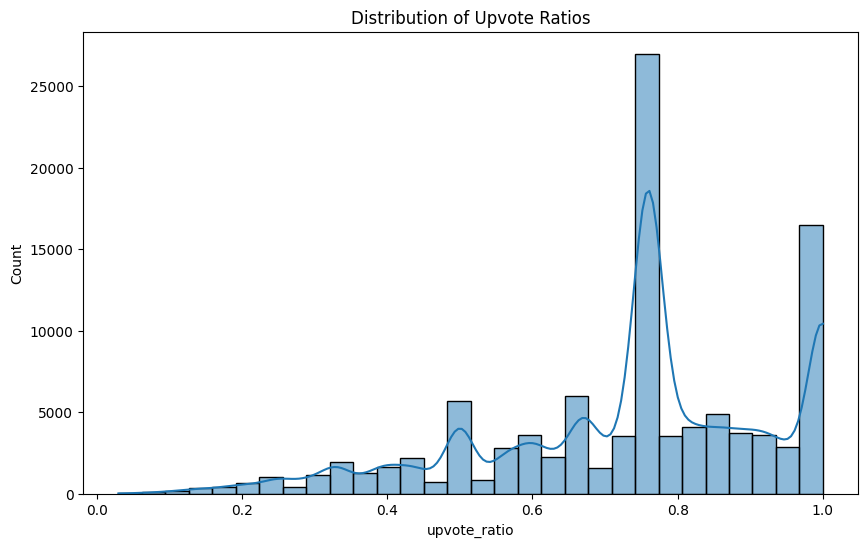

In [73]:
# Distribution of upvote ratios
plt.figure(figsize=(10, 6))
sns.histplot(submissions_df['upvote_ratio'], bins=30, kde=True)
plt.title('Distribution of Upvote Ratios')
plt.show()


- The histogram displays a bimodal distribution with two clear peaks, one around 0.7 and another sharp peak at 1.0. This indicates that posts are often either highly favored or meet with mixed reactions.

- The peak at an upvote ratio of 1.0 is particularly prominent, suggesting a significant number of posts receive almost exclusively upvotes, or at least do not accumulate downvotes.

- The spread between ratios of 0.5 to 0.7 shows varying levels of engagement, where posts receive a mixed number of upvotes and downvotes. The diverse spread indicates varied user opinions.

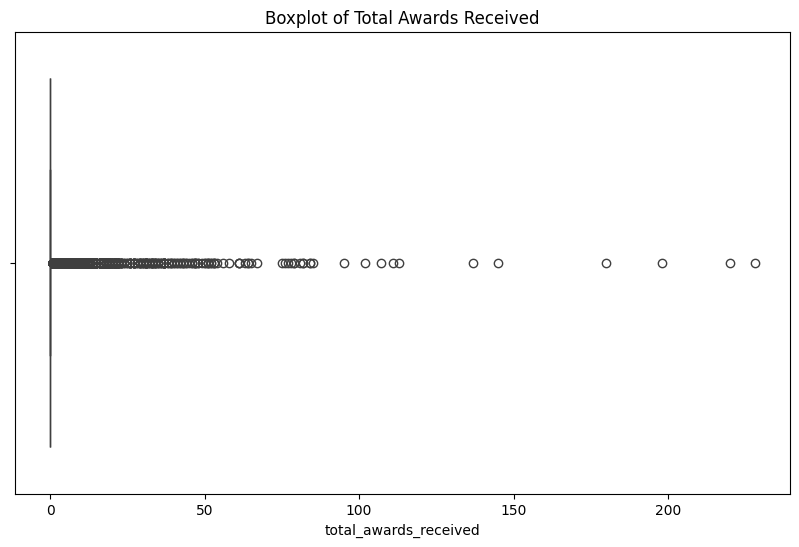

In [74]:
# Boxplot for awards received
plt.figure(figsize=(10, 6))
sns.boxplot(x=submissions_df['total_awards_received'])
plt.title('Boxplot of Total Awards Received')
plt.show()

### 2.2.3 Time Series Analysis

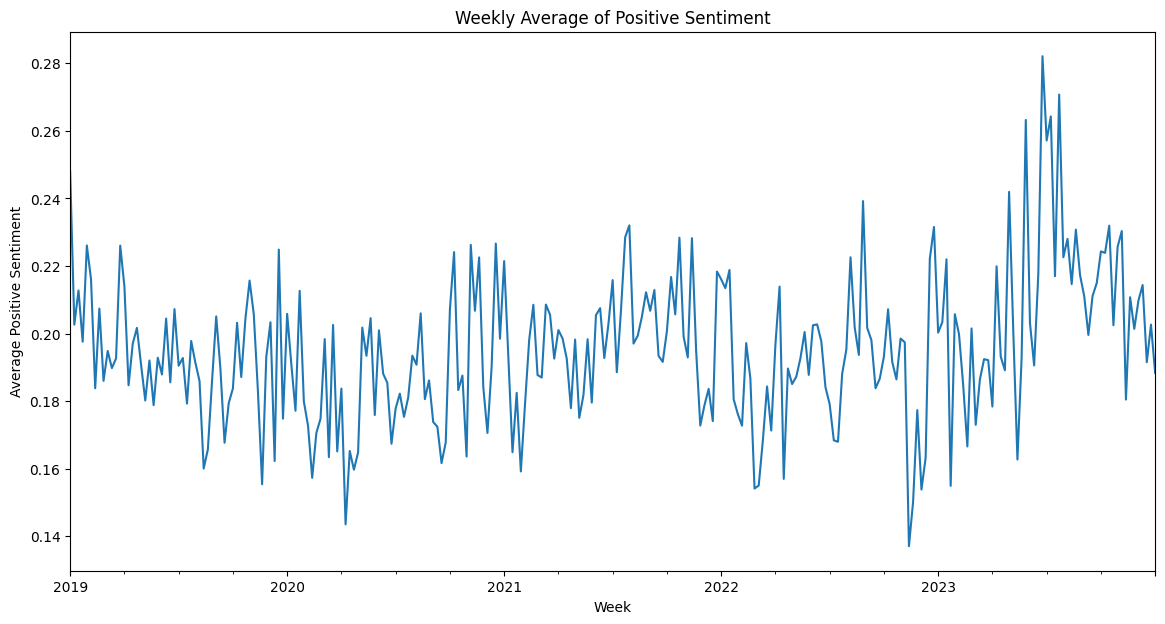

In [75]:
# Time series plot of mean sentiment over time
plt.figure(figsize=(14, 7))
submissions_df.resample('W', on='created_utc')['sentiment_positive'].mean().plot()
plt.title('Weekly Average of Positive Sentiment')
plt.ylabel('Average Positive Sentiment')
plt.xlabel('Week')
plt.show()


- The graph demonstrates variability in positive sentiment over time, with noticeable peaks and troughs. This could reflect changes in public opinion, response to events, or shifts in discussion topics.

- No clear long-term upward or downward trend is evident, suggesting that while sentiment spikes and drops, it does so around a relatively stable mean. This stability might imply a balance in the types of discussions or the effectiveness of moderation strategies in maintaining a neutral sentiment environment.

- There are periods where sentiment peaks at regular intervals which could suggest seasonal variations. These might correlate with specific events (like holidays, elections, or significant global events) that tend to evoke more positive reactions annually.

### 2.2.4 Kernel Density Estimation (KDE) 

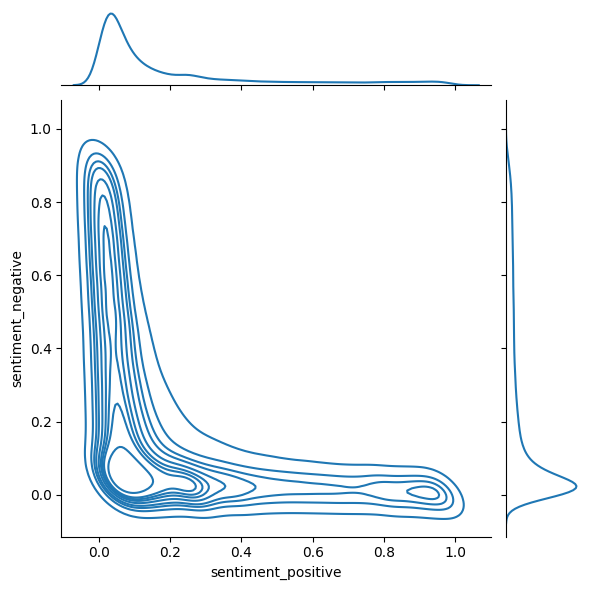

In [76]:
sns.jointplot(data=submissions_df, x='sentiment_positive', y='sentiment_negative', kind="kde")

### Key Insights:
- **Negative Bias:** The data might be biased towards negative sentiments, as indicated by the higher density regions extending towards higher negative sentiment values.
- **Neutral Zone:** A significant portion of the data seems to represent neutral sentiments, where both positive and negative scores are low.
- **Inverse Relationship:** The observed inverse relationship is consistent with typical sentiment analysis outcomes, where an increase in positive sentiment is correlated with a decrease in negative sentiment.

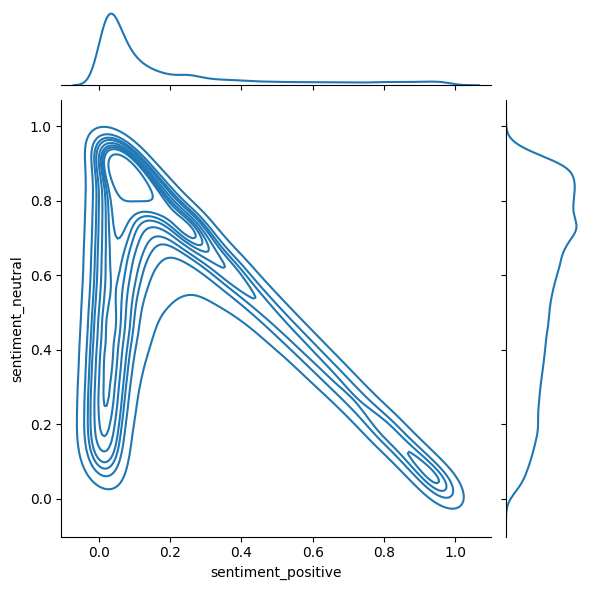

In [33]:
sns.jointplot(data=submissions_df, x='sentiment_positive', y='sentiment_neutral', kind="kde")


### Key Insights:
- **Dominant Neutrality:** A significant portion of the dataset likely represents texts that are either neutral or only slightly positive, which could suggest a style of writing or a context where overt emotional expression (positively or negatively) is minimal.
- **Inverse Relationship:** The observed trend indicates that texts with higher positive sentiment scores are less likely to be classified as neutral, which aligns with expectations in sentiment analysis.

### 2.2.5 Correlation Analysis

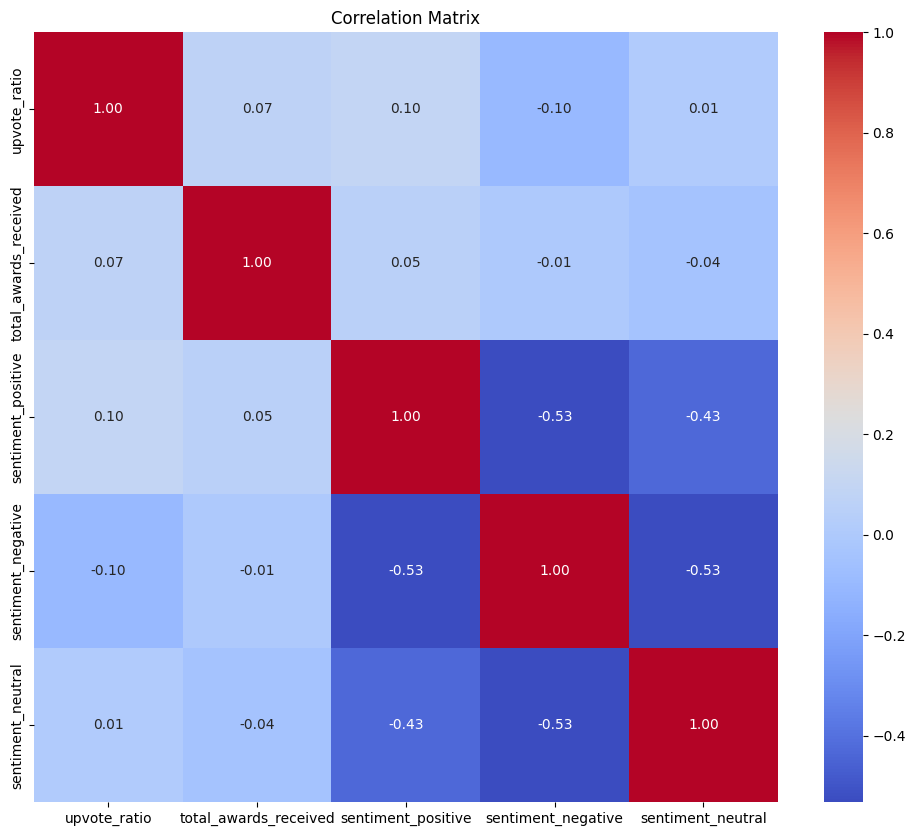

In [9]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(submissions_df[['upvote_ratio', 'total_awards_received', 'sentiment_positive', 'sentiment_negative', 'sentiment_neutral']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 2.2.6 Text Data Analysis

In [ ]:
# # Generate a word cloud for titles
# text = ' '.join(submissions_df['text'].dropna().values)
# wordcloud = WordCloud(width=800, height=400).generate(text)

# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Submission Text')
# plt.show()


## 2.3 Plot the correlation between cryptocurrency evolution

In [77]:
#Ensure datetime indices
btc_df.set_index('kline_close_time', inplace=True)
submissions_df.set_index('created_utc', inplace=True)

# Resampling data to daily frequency
btc_daily = btc_df.resample('D').mean()  # Resample Bitcoin data daily
submissions_daily = submissions_df[['sentiment_positive', 'sentiment_negative', 'sentiment_neutral']].resample('D').mean()  # Average daily sentiments


In [57]:
# Align both series by reindexing to the intersection of their indices
common_index = btc_daily.index.intersection(submissions_daily.index)
btc_daily = btc_daily.reindex(common_index)
submissions_daily = submissions_daily.reindex(common_index)


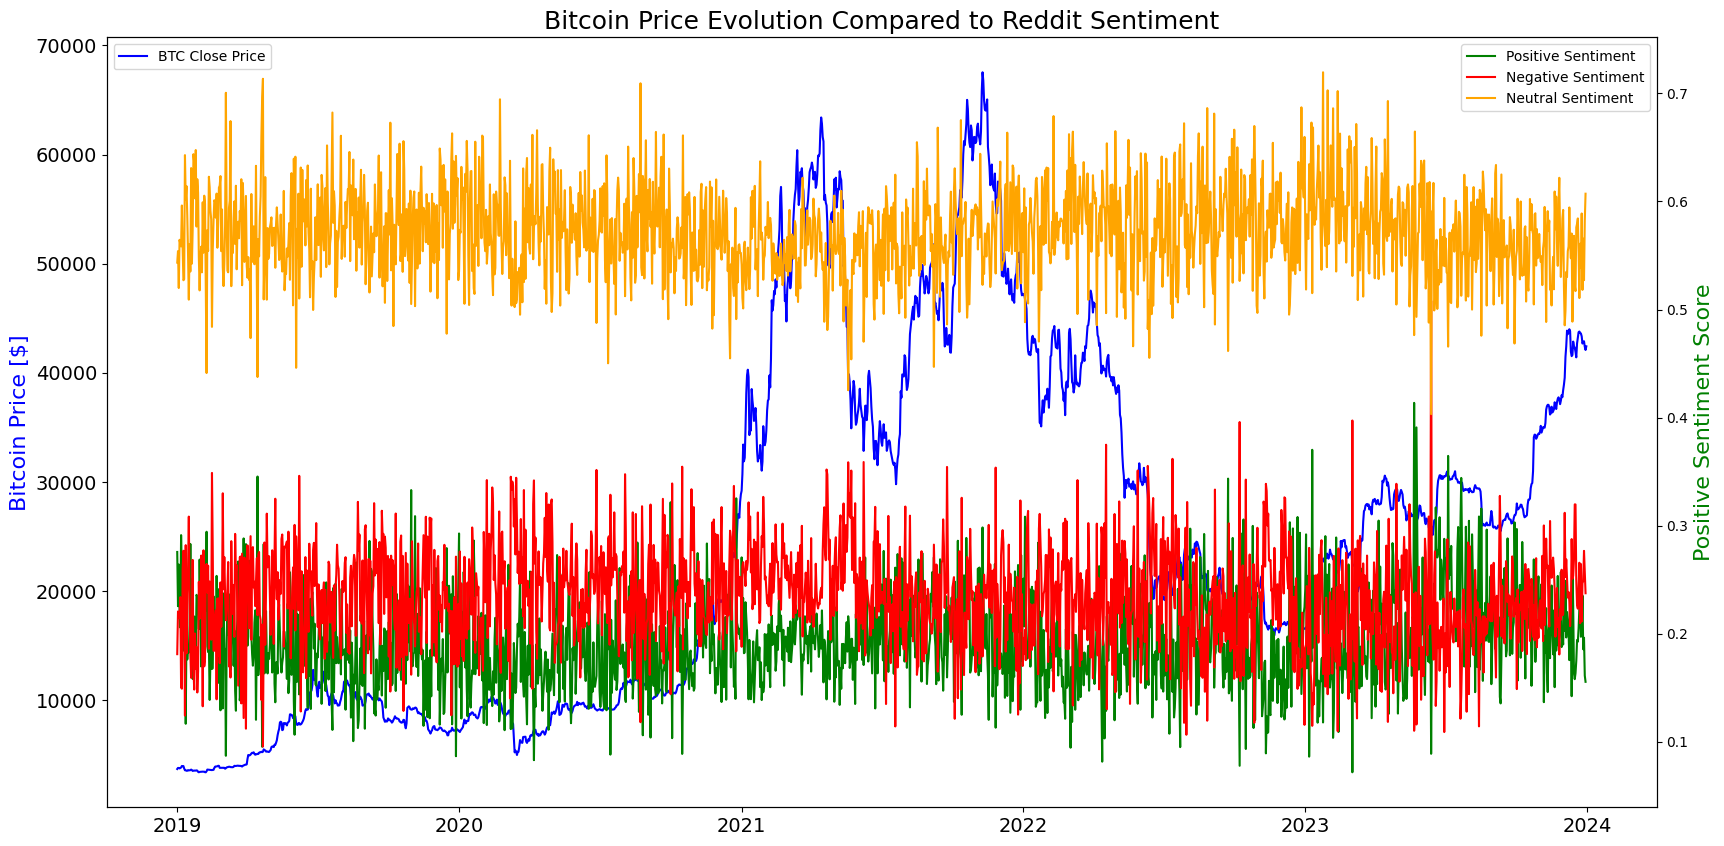

In [78]:
# Creating a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title("Bitcoin Price Evolution Compared to Reddit Sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

# Create a second y-axis for the sentiment data
ax2 = ax1.twinx()

# Plotting Bitcoin close price data on the first axis
ax1.plot_date(btc_daily.index, btc_daily['close_price'], 'b-', label='BTC Close Price')
ax1.set_ylabel("Bitcoin Price [$]", color='b', fontsize=16)

# Plotting 'sentiment_positive' as a representative sentiment metric 
ax2.plot_date(submissions_daily.index, submissions_daily['sentiment_positive'], 'g-', label='Positive Sentiment')
ax2.set_ylabel("Positive Sentiment Score", color='g', fontsize=16)

# Plotting 'sentiment_negative' and 'sentiment_neutral' as a representative sentiment metric 
ax2.plot_date(submissions_daily.index, submissions_daily['sentiment_negative'], 'r-', label='Negative Sentiment')
ax2.plot_date(submissions_daily.index, submissions_daily['sentiment_neutral'], 'orange', label='Neutral Sentiment')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


The graph overlays Bitcoin's closing price with Reddit sentiment scores (positive, negative, and neutral) over several years, illustrating potential correlations or influences between market dynamics and public sentiment:

- During periods of high price volatility in Bitcoin, there appears to be increased fluctuations in sentiment scores as well. This could indicate that market uncertainty impacts public opinion and sentiment expressed on platforms like Reddit.

- Negative sentiment seems to be more dominant or at least more volatile over the period than positive sentiment, which might reflect general public caution or skepticism around the cryptocurrency market or specific events affecting sentiment.

### 2.3.1 Cross-Correlation Function 

In [79]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """Lag-N cross correlation. 
    Parameters:
        datax, datay: pandas.Series objects of equal length
        lag: int, default 0, lag to apply to datay before correlation
        method: {"pearson", "kendall", "spearman"}, method of correlation
    Returns:
        crosscorr: float, correlation coefficient
    """
    return datax.corr(datay.shift(lag), method=method)


In [97]:
# Calculate Cross-Correlation Across Different Lags

btc_prices = btc_daily['close_price']
positive_sentiment = submissions_daily['sentiment_positive']

# Calculate cross-correlation from lag -20 to 19
xcov_pearson = [crosscorr(btc_prices, positive_sentiment, lag=i, method="pearson") for i in range(-20, 20)]
xcov_kendall = [crosscorr(btc_prices, positive_sentiment, lag=i, method="kendall") for i in range(-20, 20)]
xcov_spearman = [crosscorr(btc_prices, positive_sentiment, lag=i, method="spearman") for i in range(-20, 20)]


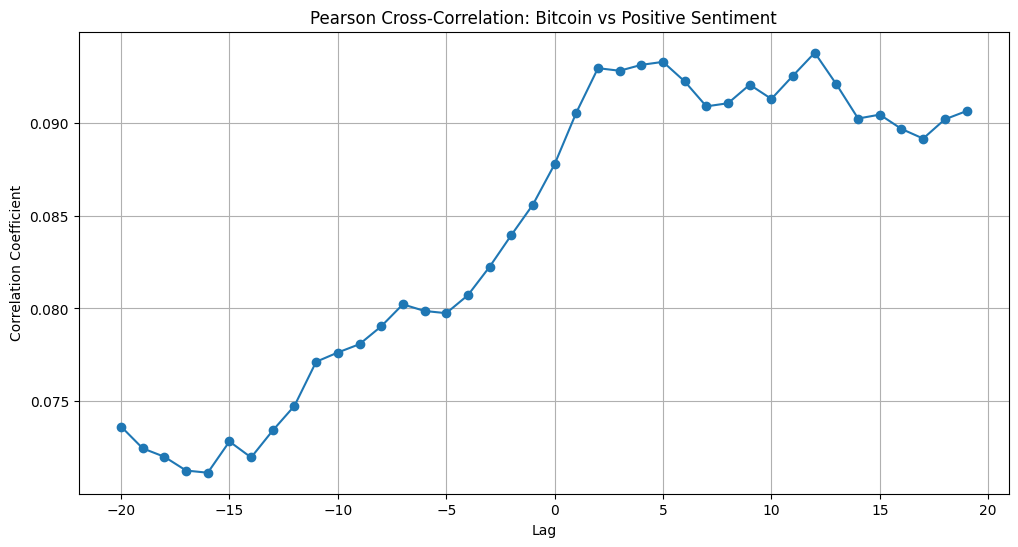

In [98]:
# Plotting Pearson correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_pearson, marker='o', linestyle='-')
plt.title("Pearson Cross-Correlation: Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()


Peaks around lag 0, suggesting that Bitcoin prices and positive sentiment are most closely linearly related without a time shift. The correlation remains relatively stable for positive lags, indicating that past sentiment relates closely to future Bitcoin prices.

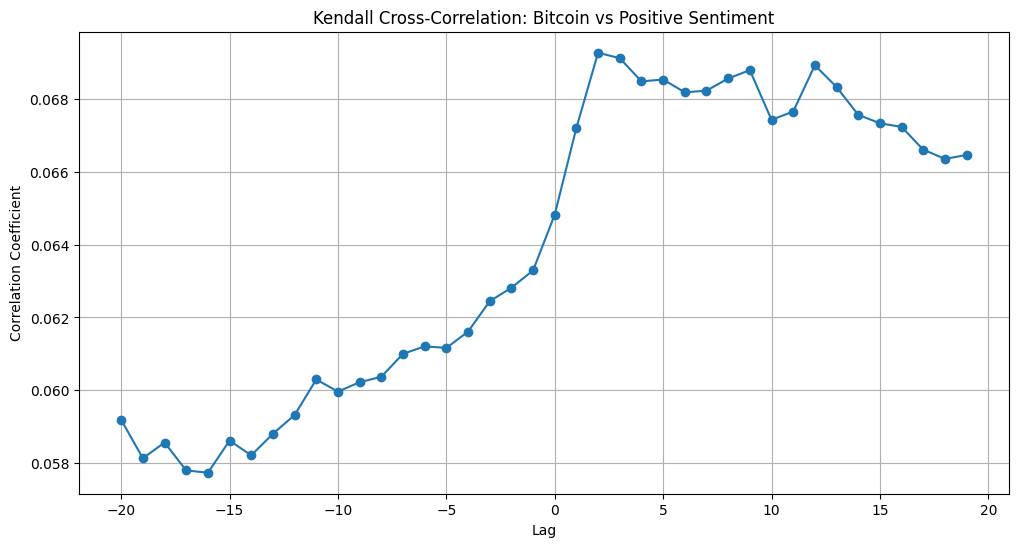

In [99]:
# Plotting Kendall correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_kendall, marker='o', linestyle='-')
plt.title("Kendall Cross-Correlation: Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

Follows a similar pattern, peaking at lag 0, which supports the non-parametric rank correlation between Bitcoin prices and sentiment. The correlation declines for lags beyond 10, suggesting less alignment in the ranking of data as the time shift increases.


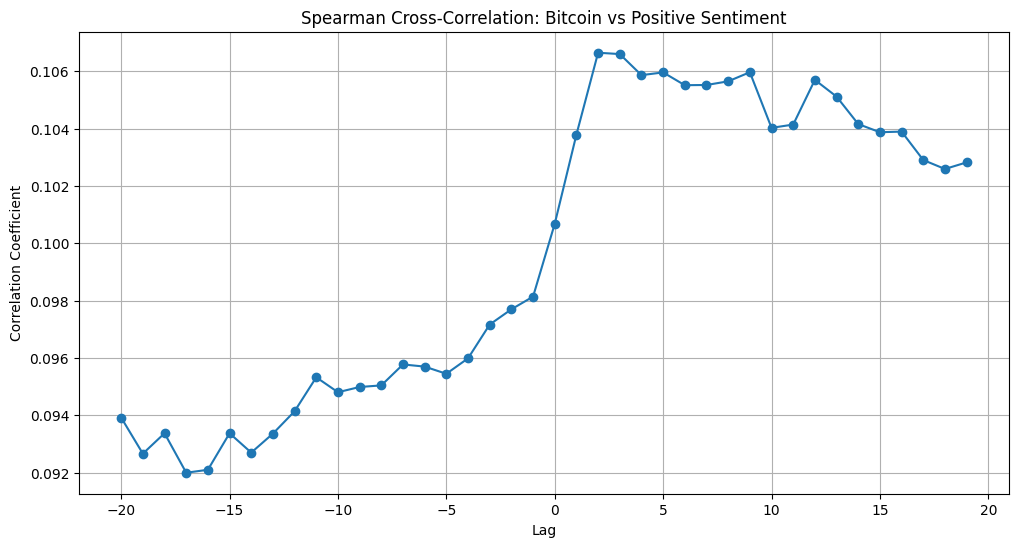

In [100]:
# Plotting Spearman correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_spearman, marker='o', linestyle='-')
plt.title("Spearman Cross-Correlation: Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()


Also peaks around lag 0, indicating a strong monotonic relationship at this point. The correlation remains relatively stable or declines slightly at higher positive lags, similar to the Pearson results.

**Key Insights:**

- The highest correlation at lag 0 across all methods suggests that changes in Reddit sentiment can simultaneously correlate with changes in Bitcoin prices.

- The correlation strength varies slightly between methods, but the overall trend supports the influence of sentiment on price or vice versa without significant time delays.

- The consistency across different correlation methods enhances the robustness of these findings, indicating that both linear and rank-based relationships are significant.

### 2.3.2 Normalization

In [84]:
# Normalize Reddit sentiment data
standard_scaler = StandardScaler()
sentiment_scaled = standard_scaler.fit_transform(submissions_daily[['sentiment_positive', 'sentiment_negative', 'sentiment_neutral']].values)
submissions_daily['normalized_sentiment_positive'] = sentiment_scaled[:, 0]  
submissions_daily['normalized_sentiment_negative'] = sentiment_scaled[:, 1] 
submissions_daily['normalized_sentiment_neutral'] = sentiment_scaled[:, 2] 

In [85]:

# Normalize Bitcoin closing price
btc_daily['normalized_close'] = btc_daily['close_price'] / max(btc_daily['close_price'].max(), abs(btc_daily['close_price'].min()))


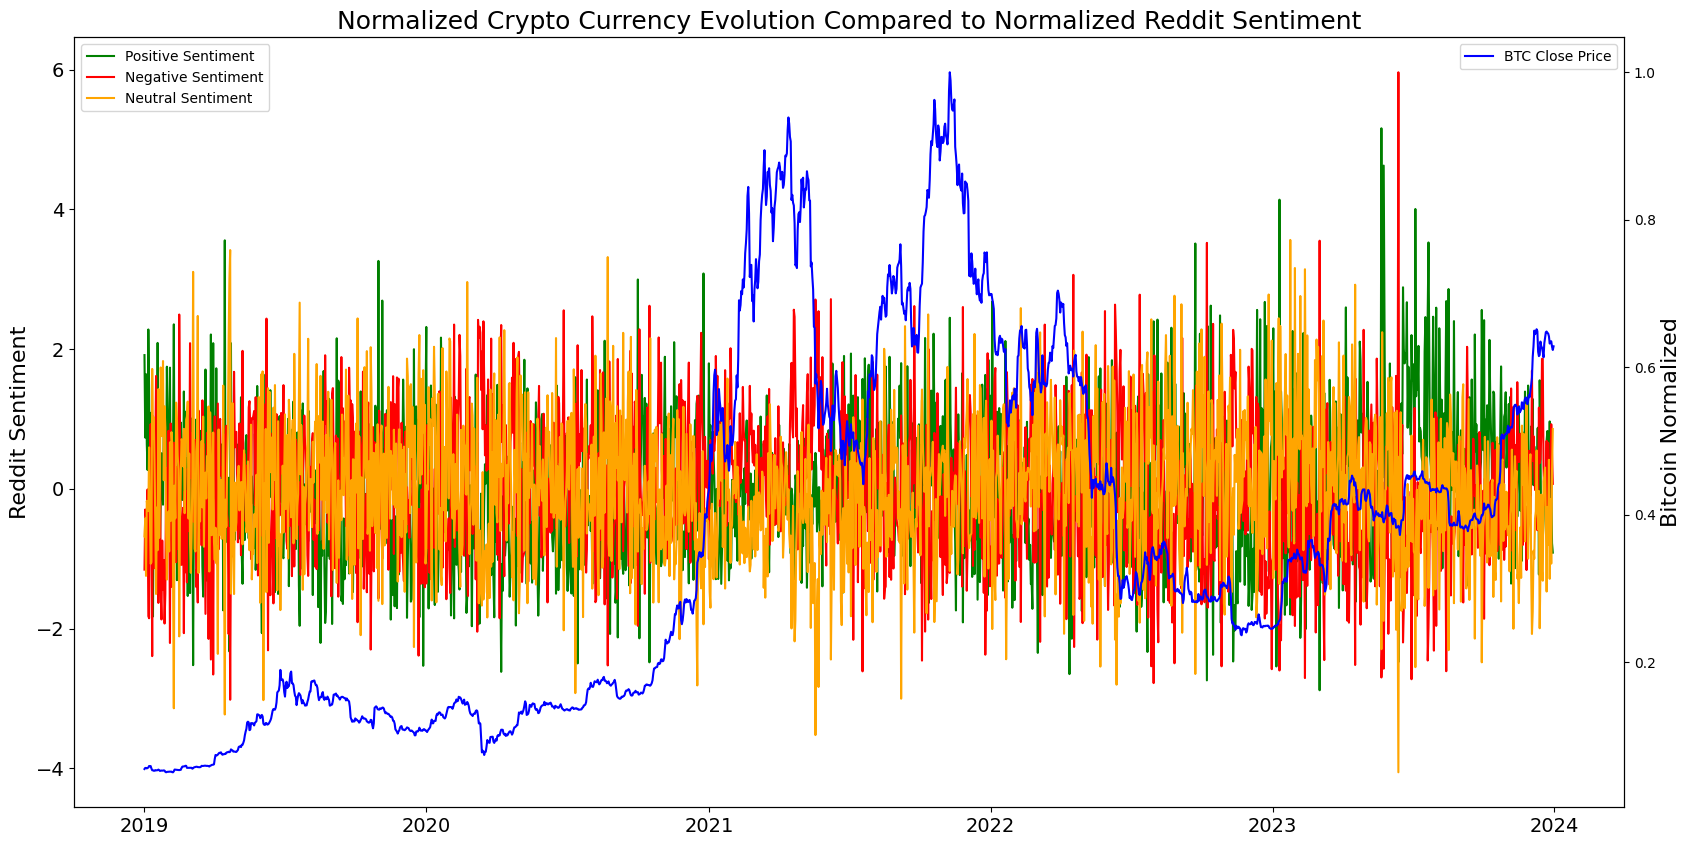

In [93]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title("Normalized Crypto Currency Evolution Compared to Normalized Reddit Sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

# Create a secondary y-axis for the Bitcoin price data
ax2 = ax1.twinx()

# Plotting the sentiment data on the primary y-axis
ax1.plot_date(submissions_daily.index, submissions_daily['normalized_sentiment_positive'], 'g-', label='Positive Sentiment')
ax1.plot_date(submissions_daily.index, submissions_daily['normalized_sentiment_negative'], 'r-', label='Negative Sentiment')
ax1.plot_date(submissions_daily.index, submissions_daily['normalized_sentiment_neutral'], 'orange', label='Neutral Sentiment')

# Plotting the Bitcoin price data on the secondary y-axis
ax2.plot_date(btc_daily.index, btc_daily['normalized_close'], 'b-', label='BTC Close Price')

ax1.set_ylabel("Reddit Sentiment", fontsize=16)
ax2.set_ylabel("Bitcoin Normalized", fontsize=16)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


- The sentiment data—positive (green), negative (red), and neutral (orange)—also shows fluctuation but does not mirror the Bitcoin price movements consistently. This suggests that while there may be some connection between market sentiment and price, they do not always move in tandem.

-  The intensity and frequency of the sentiment peaks and troughs indicate varying degrees of community reaction. Significant spikes in negative sentiment occasionally precede or coincide with price drops, whereas positive sentiment spikes are less clearly correlated with price rises.

- There are instances where a significant change in sentiment precedes a price adjustment, suggesting potential use as a leading indicator. However, these occurrences are inconsistent, and further analysis would be required to establish a reliable predictive relationship.

- The noticeable surge in Bitcoin prices towards the latest dates on the graph correlates with a rise in positive sentiment and a decline in negative and neutral sentiments. This could indicate a strong positive public reaction to rising Bitcoin values or potentially influencing factors leading to a bullish market.

- By normalizing these values, the plot facilitates a direct comparison of how sentiment and price levels change relative to each other over time, although it abstracts away the magnitude of raw price changes and sentiment scores.

In [88]:
# Calculate cross-correlation for different lags

btc_prices_normalized = btc_daily['normalized_close']
positive_sentiment_normalized = submissions_daily['normalized_sentiment_positive']


xcov_pearson = [crosscorr(btc_prices_normalized, positive_sentiment_normalized, lag=i, method="pearson") for i in range(-20, 20)]
xcov_kendall = [crosscorr(btc_prices_normalized, positive_sentiment_normalized, lag=i, method="kendall") for i in range(-20, 20)]
xcov_spearman = [crosscorr(btc_prices_normalized, positive_sentiment_normalized, lag=i, method="spearman") for i in range(-20, 20)]


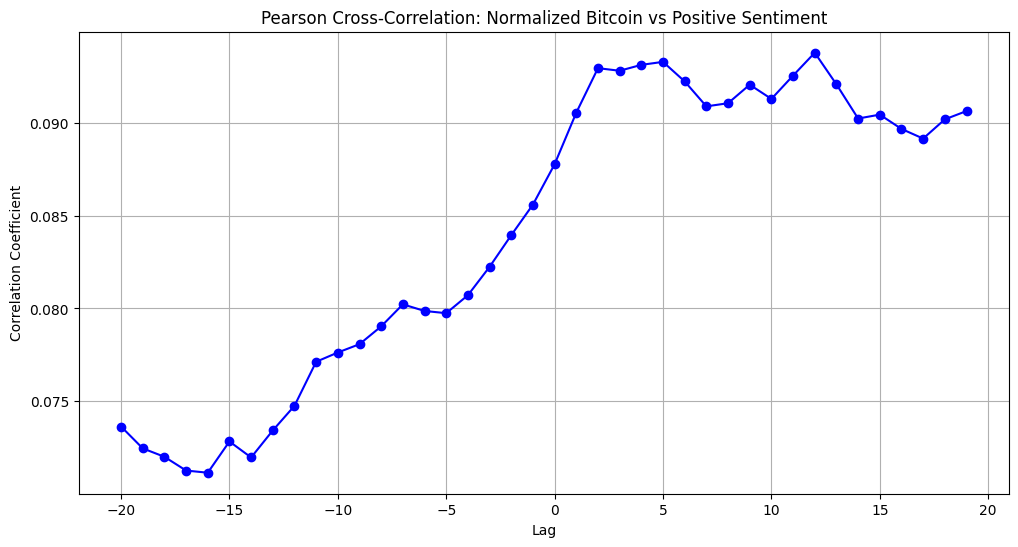

In [101]:
# Plotting Pearson correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_pearson, marker='o', linestyle='-', color='blue')
plt.title("Pearson Cross-Correlation: Normalized Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

- The correlation coefficient peaks just above 0.090 when the lag is positive, indicating that changes in Bitcoin prices might be slightly leading changes in positive sentiment, or vice versa, positive sentiment is reacting to the price changes with a slight delay.

- The correlation increases as the lag approaches zero from negative values and continues to increase into positive lags. This suggests a time-dependent relationship where sentiment might react to price changes after they occur.

- Post the peak, the correlation remains relatively stable around a high value as the lag increases, indicating a sustained reaction of sentiment to changes in Bitcoin prices over the observed period.

- The symmetric nature around lag zero could be indicative of the dynamic interaction between market behavior and sentiment, where each can influence the other over time.

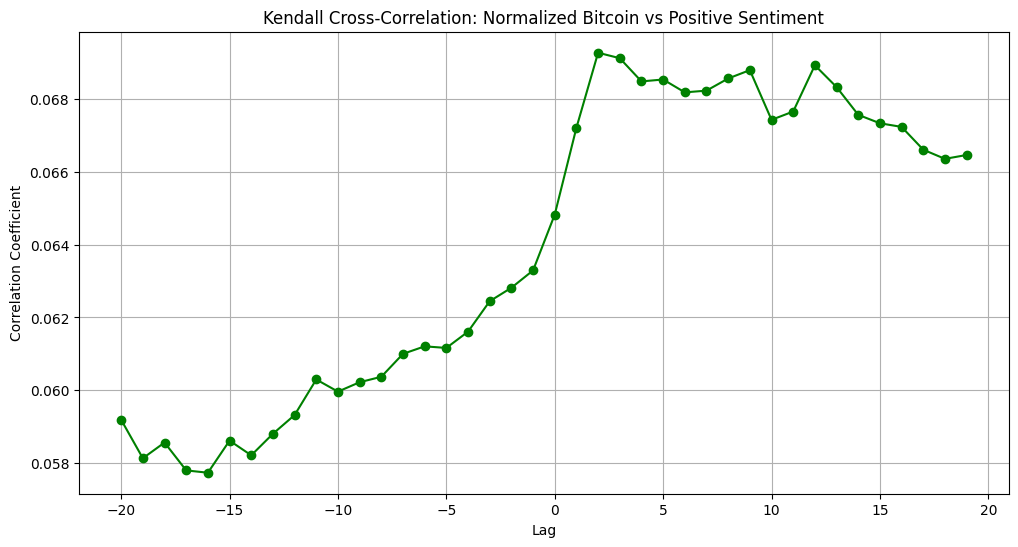

In [102]:
# Plotting Kendall correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_kendall, marker='o', linestyle='-', color='green')
plt.title("Kendall Cross-Correlation: Normalized Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()

- The correlation steadily increases as the lag approaches zero, peaking slightly above a lag of 0. This pattern suggests a strong monotonic relationship where increases in Bitcoin prices tend to coincide with increases in positive sentiment, reaching a maximum correlation at almost simultaneous moment.

- After reaching the peak, the correlation remains relatively stable for positive lags, indicating that the sentiment continues to move in tandem with Bitcoin prices even after the initial reaction period.

-  As the lag increases further into positive values, there's a gradual decline in the correlation coefficient. This could imply that the influence of Bitcoin price movements on positive sentiment diminishes over time, or it might suggest that the market adjusts to new price levels.

- At negative lags, where sentiment precedes Bitcoin price changes, the correlation is significantly lower, supporting the idea that sentiment follows price more closely than it predicts it.

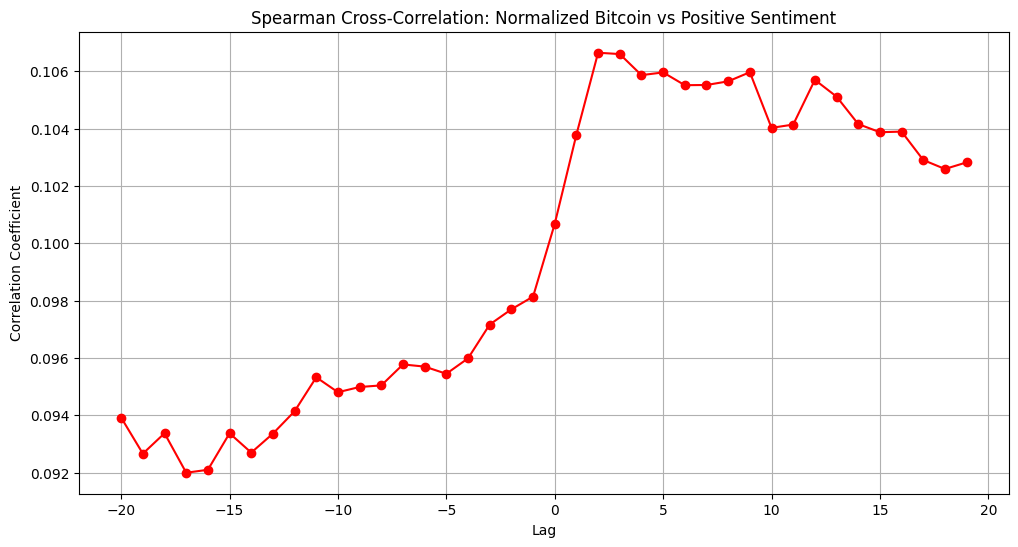

In [103]:
# Plotting Spearman correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-20, 20), xcov_spearman, marker='o', linestyle='-', color='red')
plt.title("Spearman Cross-Correlation: Normalized Bitcoin vs Positive Sentiment")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
plt.show()


- The correlation coefficient increases steadily until it reaches a plateau near zero lag. This suggests a strong rank correlation where Bitcoin price changes and positive sentiment changes tend to move together in a ranked order, reaching maximum synchronicity around zero lag.

- Post-peak, the correlation shows slight fluctuations but generally maintains high values for positive lags. This indicates that even after peak correlation, positive sentiment in discussions remains influenced by Bitcoin’s price action, albeit with slightly less synchronicity as time progresses.

- Before zero lag, the correlation is consistently lower, suggesting that sentiment doesn’t predict price changes as much as it reacts to them.

- At zero lag, the correlation is highest, indicating that changes in Bitcoin prices and positive sentiment are most aligned at the same time. This plateau suggests that as Bitcoin prices peak or trough, so does the positive sentiment in the community, reflecting immediate reactions on Reddit.

- As the lag increases beyond zero in the positive direction, the correlation gradually declines. This decline suggests that the immediate impact of Bitcoin price changes on positive sentiment diminishes over time.

## 2.4 Derivative of Crypto price

In [90]:
# Compute the derivative of normalized Bitcoin close prices
btc_daily_derivative = pd.Series(np.gradient(btc_daily['normalized_close'].values), 
                                 btc_daily.index, name='Bitcoin Price Derivative')

# Compute the derivative of normalized positive sentiment scores
submissions_daily_derivative = pd.Series(np.gradient(submissions_daily['normalized_sentiment_positive'].values), 
                                         submissions_daily.index, name='Positive Sentiment Derivative')


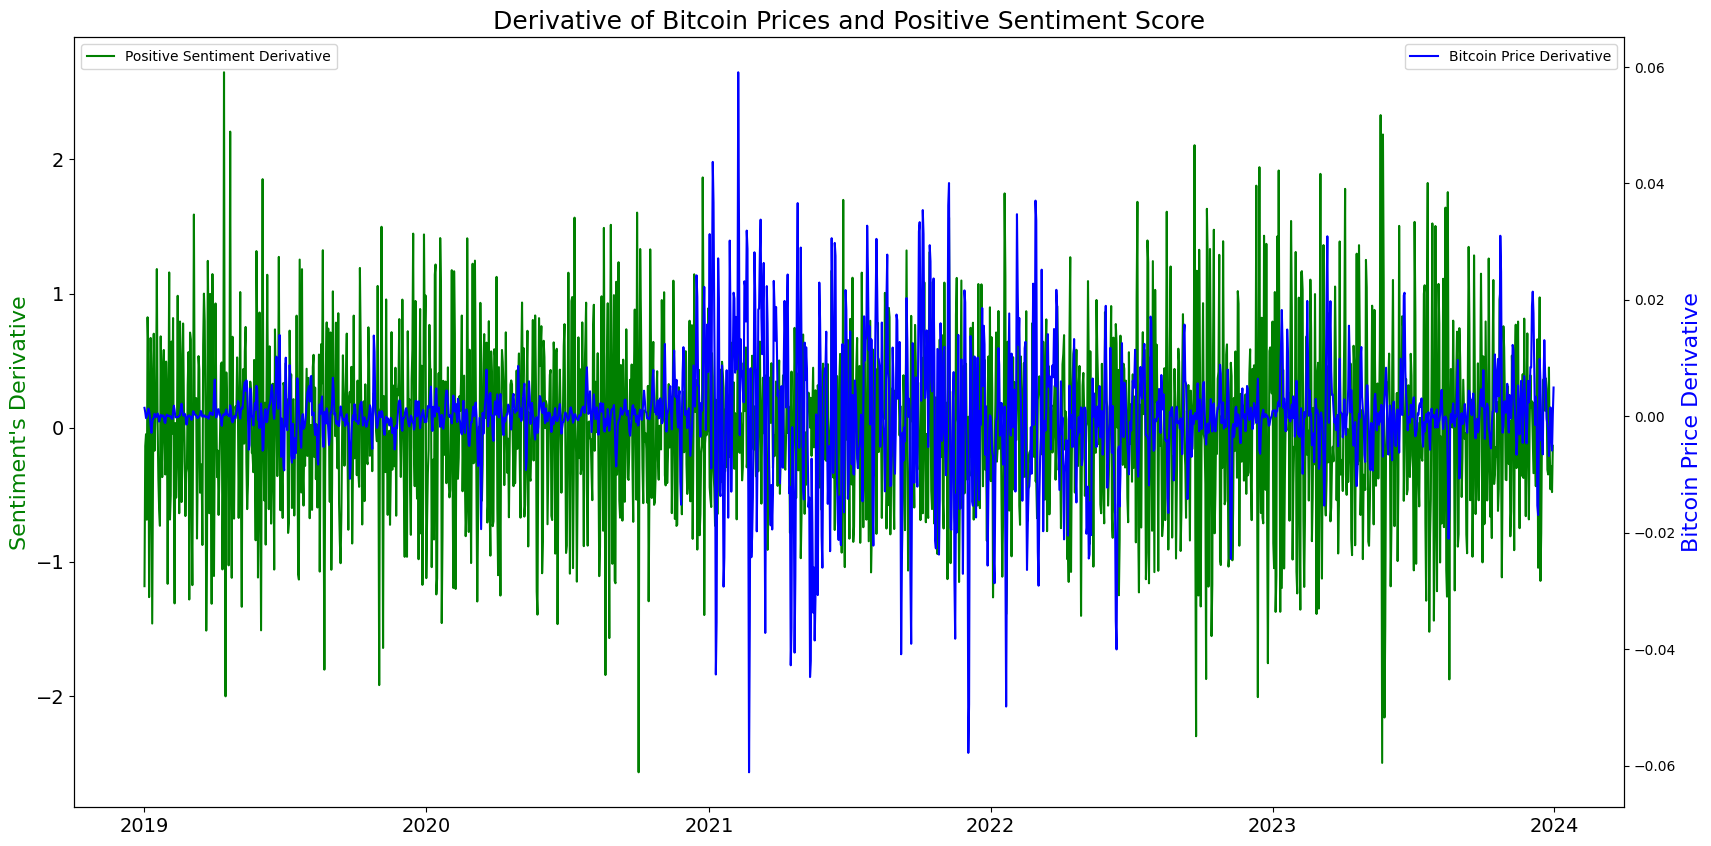

In [91]:
# Plotting
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.set_title("Derivative of Bitcoin Prices and Positive Sentiment Score", fontsize=18)
ax1.tick_params(labelsize=14)

# Creating a secondary axis
ax2 = ax1.twinx()

# Plotting the derivatives on the primary axis
ax1.plot_date(submissions_daily_derivative.index, submissions_daily_derivative, 'g-', label='Positive Sentiment Derivative')
ax1.set_ylabel("Sentiment's Derivative", color='g', fontsize=16)

# Plotting the derivatives on the secondary axis
ax2.plot_date(btc_daily_derivative.index, btc_daily_derivative, 'b-', label='Bitcoin Price Derivative')
ax2.set_ylabel('Bitcoin Price Derivative', color='b', fontsize=16)


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


- At various points, the derivatives appear to move in tandem, suggesting moments when changes in Bitcoin prices might correlate with shifts in positive sentiment, and vice versa. This alignment can imply that as Bitcoin prices increase or decrease sharply, the sentiment on Reddit reflects these changes almost concurrently.

- Despite some correlation, there's no consistent pattern where the two derivatives always align, which suggests that other factors may influence sentiment independently of Bitcoin's price changes.

- There are instances where spikes in sentiment precede or follow shifts in Bitcoin prices. This lag or lead could be explored further to determine if sentiment can serve as a leading or lagging indicator for price movements.

- The extremes in the sentiment derivative are more pronounced than those in the Bitcoin price derivative, indicating that sentiment reactions may be more extreme than the actual price movements.

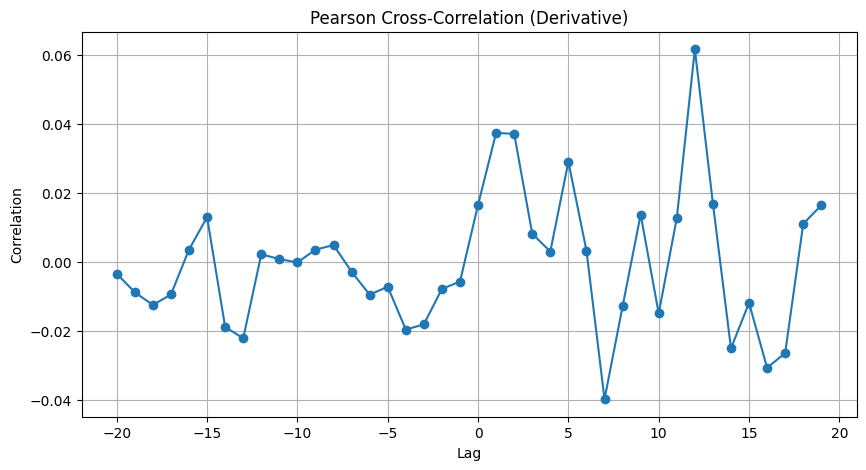

In [104]:
# Calculate Pearson cross-correlation
xcov_pearson = [crosscorr(btc_daily_derivative, submissions_daily_derivative, lag=i, method="pearson") for i in range(-20, 20)]
plt.figure(figsize=(10, 5))
plt.plot(range(-20, 20), xcov_pearson, marker='o')
plt.title("Pearson Cross-Correlation (Derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

The Pearson Cross-Correlation plot of the derivatives for Bitcoin prices and positive sentiment score shows the relationship between the rate of change in Bitcoin prices and changes in sentiment over various time lags. The correlation values fluctuate significantly across different lags, indicating periods where the changes in sentiment align closely or divergently with changes in Bitcoin prices. Notably, the correlation peaks around lags of 10 and 15, suggesting a potential delayed reaction or predictive value in sentiment changes relative to Bitcoin price movements. These results might reflect how quickly or slowly market sentiment reacts to changes in Bitcoin prices, or possibly the impact of external events affecting both variables within similar time frames.

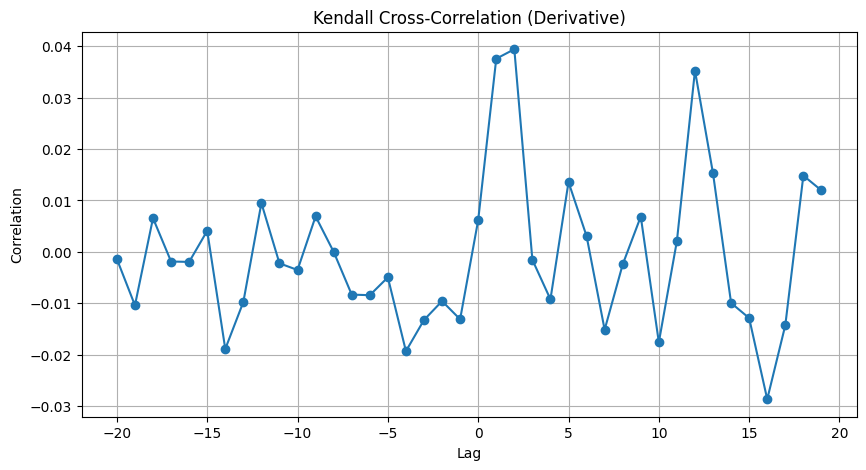

In [110]:
# Calculate Kendall cross-correlation
xcov_kendall = [crosscorr(btc_daily_derivative, submissions_daily_derivative, lag=i, method="kendall") for i in range(-20, 20)]
plt.figure(figsize=(10, 5))
plt.plot(range(-20, 20), xcov_kendall, marker='o')
plt.title("Kendall Cross-Correlation (Derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

The Kendall Cross-Correlation plot of the derivatives for Bitcoin prices and positive sentiment illustrates the non-parametric relationship between their rate of change over different time lags. This correlation plot shows fluctuations and several peaks indicating moments where the directional changes in Bitcoin prices align with those in sentiment. Notably, there are prominent peaks around lags 10 and 15, suggesting that changes in sentiment may follow or precede similar trends in Bitcoin prices after these specific delays. The variations in the correlation coefficients indicate the complex interplay between market price actions and public sentiment, reflecting the nuanced influence of external factors and market psychology on cryptocurrency dynamics.

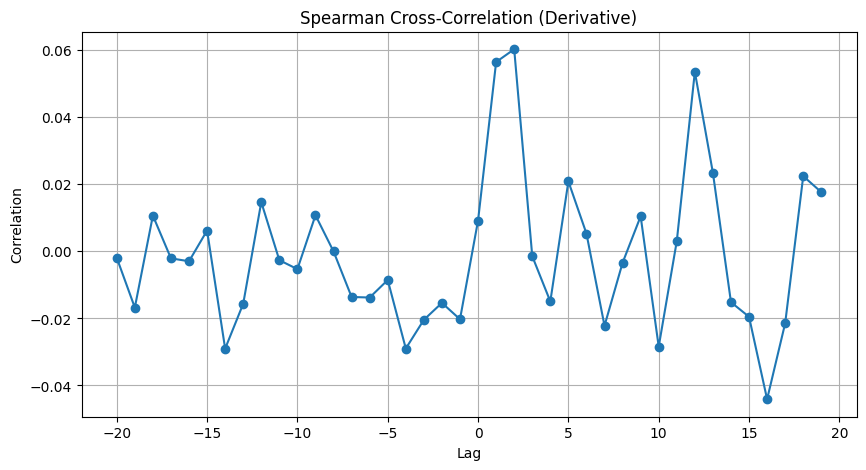

In [111]:
# Calculate Spearman cross-correlation
xcov_spearman = [crosscorr(btc_daily_derivative, submissions_daily_derivative, lag=i, method="spearman") for i in range(-20, 20)]
plt.figure(figsize=(10, 5))
plt.plot(range(-20, 20), xcov_spearman, marker='o')
plt.title("Spearman Cross-Correlation (Derivative)")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()


- Peaks at lags around 0, 5, and 15 suggest moments where the rate of change in sentiment closely follows or precedes shifts in Bitcoin prices.

- The correlation values rise sharply as the lag approaches zero, indicating a strong synchrony in the rate of change around this point, which may imply that rapid changes in Bitcoin prices can have an immediate and significant impact on sentiment or vice versa.

- Negative correlations at several lags, particularly noticeable around -10 and -15, could suggest that in some instances, a change in sentiment is followed by a reverse change in Bitcoin prices.